# Mozilla 2019 Outreachy Data Science Project

## Part 1: Initial Contribution

In [1]:
#importing packages need for exploratory data analysis and data visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### I'll start by using Pandas to convert the CSV file into a Dataframe.

In [2]:
#load in dataset
df = pd.read_csv('dataset.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Thanks to Pandas built in .head() function, we can preview some of the columns from our dataset. However, this is just a sneak peak. 

I want to know more about each column and their datatypes. With this information, I can decide which data analysis methods are best suited for this dataset and whether some data cleaning is necessary.

In [3]:
#check column names
col_names = df.columns
print(list(col_names))

#get datatypes for each column
df.info()

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

**This dataset has a mix of datatypes including floats, integers, and objects (which represent strings).**

_sidenote:_
From the information above, we can see certain features have very little data to offer. For example, there are only seven properties mentioned have pools therefore we can go ahead and probably assume the PoolQC feature won't be the best choice for describing the Sales Price. Three other features with few data are MiscFeature, Alley, and Fence. 

## Data Cleaning and Manipulation

#### I've decided to drop the features with too few values since they won't be the best source of information.

I'm using pandas .drop() function to access these specific columns and drop them while still keeping the same number of rows.

In [4]:
df = df.drop(['PoolQC', 'Alley', 'Fence', 'MiscFeature'], axis=1)

#### I am using some basic built-in Pandas functions to assess the cleanliness of the dataset.

An easy thing to check for is whether or not the dataframe has any duplicate rows due to some error when the data was being compiled. Using pandas .duplicated() function, I created a temporary dataframe where all duplicates would be stored. It returned an empty dataframe, meaning there are no duplicate rows in the dataset.

In [5]:
#looking for duplicate rows (there are none)
duplicatesdf = df[df.duplicated()]
print(duplicatesdf)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


Another thing to look out for when exploring your dataset is NaN or missing values. You wanna drop or fill NaN values so they don't cause errors or skew your data when you begin your analysis. Another handy built in pandas function is .isna() which will check if column has any null values and reutrns True or False

In [6]:
#checking if any columns contain nan values
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF         False
2ndFlrSF   

I wanted to know more about the columns with NaN values so I used .sum() to get the total number for each column. Next, I'm going to consult the data_description file to get an understanding of those particular columns.

In [7]:
#examine nan values closer
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

#### Breakdown of columns with NaN values

- LotFrontage = linear feet of street connected to property. (These NaN values could be due to properties with no lot frontage as opposed to errors or missing information)
- MasVnrType, MasVnrArea = Homes that have mason veneers and the area in square feet. (These NaN values represent properties that don't have mason veneers, it is not due to an error)
- BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2 = These columns describe various aspects of the basement in these units. (According to the data description, NA symbolizes the homes without basements. Therefore we know these aren't due to errors)
- Electrical = type of electrical system in property. (There is only one NaN value probably due to a small error or missing information
- FireplaceQu = quality of fireplace (NaN values can be attributed to homes without a fireplace. This is not due to errors)
- GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond = descriptive information about properties with garages (NaN values represent homes with no garages)

**I've concluded that all the NaN values, excluding the Electrical column, are mostly valid and due to some properties having certain features that others don't.**

Since the rest of the values in the LotFrontage column are floats, I am using Pandas .fillna() function to put a 0 in place of NaN to represent properties with no Lot Frontage.

In [8]:
df['LotFrontage'].fillna('0.0', inplace = True) 

In [9]:
#checking for null values to confirm that it worked 
df['LotFrontage'].isnull().sum()

0

I am going to handle the mason veneer type and the mason veneer area featueres separately since one is a string object and the other is a float. I'm going to replace the type with NoMV (no mason veneer) and the area with the value 0.0

In [10]:
df['MasVnrType'].fillna('NoMV', inplace = True)
df['MasVnrArea'].fillna('0.0', inplace = True)

In [11]:
#checking for null values
df[['MasVnrType', 'MasVnrArea']].isnull().sum()

MasVnrType    0
MasVnrArea    0
dtype: int64

The values for the basement properties are all strings. I've decided to replace NA with NB (no basement) which creates a new class within that category to replace the missing values.

In [12]:
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NB')

In [13]:
#checking for null values 
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

I believe the one electrical NaN value will be pretty inconsequential to the whole dataset. I'm going to change the value to NotSpecif so it wont throw an error later.

In [14]:
df['Electrical'].fillna('NotSpecif', inplace = True) 

In [15]:
#checking for nan values to see if it worked
df['Electrical'].isnull().sum()

0

Fireplace Quality is another string object. I am going to replace NA with NF (no fireplace) so that there isn't a null value for properties without this feature.

In [16]:
df['FireplaceQu'].fillna('NF', inplace = True)

In [17]:
#confirming that it worked
df['FireplaceQu'].isnull().sum()

0

Lastly, I am going to replace the null values in the Garage category with NG to represent properties without garages.

In [18]:
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']] = df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']].fillna('NG')

In [19]:
df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
dtype: int64

#### I've replaced all the null values in the dataframe as part of my data cleaning process. After I confirm it worked by checking the entire dataframe for null values, I can move on to the next part.

In [20]:
df.isnull().values.any()

False

The last column I am going to drop is the ID column. The dataframe has an index and this feature isn't necessary for answering the questions about the sales price.

In [21]:
del df['Id']

## Data Exploration

I am using pandas built-in .describe() function to get some summary statistics about the numerical data presented in the dataframe. There is some interesting information about how many unique values each column has, the top value found, the min and max for each column, and the std deviation to name a few. There are NaN values where certain descriptive statistics don't apply to that datatype.

In [22]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1460,111,0.0,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotConfig,1460,5,Inside,1052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandSlope,1460,3,Gtl,1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I am going to create a dataframe specifically for numerical datatypes so we can explore the numerical data distribution

In [23]:
num_df = df.select_dtypes(include = ['float64', 'int64'])
num_df.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
5,50,14115,5,5,1993,1995,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,20,10084,8,5,2004,2005,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,307000
7,60,10382,7,6,1973,1973,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,2,484,235,204,228,0,0,0,350,11,2009,200000
8,50,6120,7,5,1931,1950,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,2,468,90,0,205,0,0,0,0,4,2008,129900
9,190,7420,5,6,1939,1950,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1,205,0,4,0,0,0,0,0,1,2008,118000


_sidenote:_ Now that I've separated the numerical data, I am noticing new features now that I'd like to take a closer look at later such as Overall Quality and Overall Condition.

### Frequency Distribution of Sale Price

Text(0.5,0,'US Dollars')

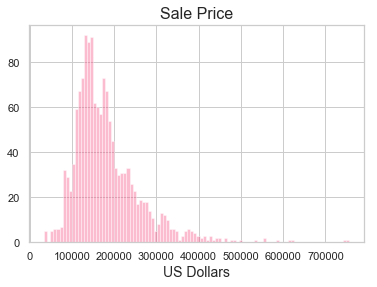

In [40]:
sns.set(style="whitegrid")
sns.distplot(df['SalePrice'], kde=False, color='#F85888', bins=100)
plt.title('Sale Price', fontsize=16)
plt.xlabel('US Dollars', fontsize=14)

### Density Plot of Sale Price

Text(0,0.5,'Density')

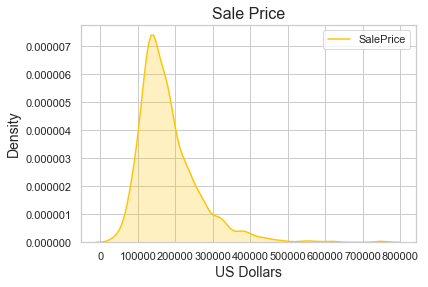

In [65]:
sns.set(style="whitegrid")
sns.kdeplot(df['SalePrice'], color='#fec508', shade=True)
plt.title('Sale Price', fontsize=16)
plt.xlabel('US Dollars', fontsize=14)
plt.ylabel('Density', fontsize=14)



### Outlier Analysis

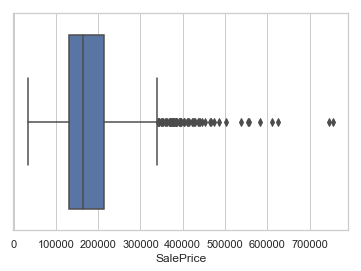

In [37]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df['SalePrice'])

#### Z-Score

In [76]:
#shows which rows are outliers using the z score

from scipy import stats

def get_z_score(data):
    z = np.abs(stats.zscore(data))
    threshold = 3
    print(np.where(z > 3))

z_score = get_z_score(df['SalePrice'])
z_score

(array([  58,  178,  185,  349,  389,  440,  473,  496,  527,  591,  664,
        691,  769,  798,  803,  898, 1046, 1142, 1169, 1182, 1243, 1373]),)


#### Interquartile Range (IQR)

In [75]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

84025.0


## Resources

- [Using pandas describe method dataframe summary](https://backtobazics.com/python/pandas-describe-method-dataframe-summary/)
- [How to make histogram in python with pandas and seaborn](https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/)
- [Ways to Detect and Remove Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)